# Change initial ranges

_25 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

What happens if we change the initial range according to what we guessed from `low-noise-2.ipynb`?

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

In [2]:
common_specs = {
    'rounds':                   ('expect', 150),
    'batch_size':               ('expect', 64),
    'epochs':                   ('expect', 1),
    'ema_coefficient':          ('expect', 1 / 3),
    'save_squared_error':       ('expect', False),
    'send':                     ('expect', 'deltas'),
    'power':                    ('title',  1.0),
    'optimizer_client':         ('expect', 'sgd'),
    'clients':                  ('title',  20),
    'noise':                    ('series', '__all__'),
    'lr_scheduler_client':      ('expect', 'none'),
}
base_analog_specs = common_specs.copy()
base_analog_specs.update({
    'script': 'dynpower.py',
    'power_update_period':      ('expect', 1),
    'power_factor':             ('expect', 0.9),
    'power_quantile':           ('expect', 1.0),
})
base_digital_specs = common_specs.copy()
base_digital_specs.update({
    'script': 'dynquant.py',
    'qrange_update_period':     ('expect', 1),
    'channel_uses':             ('expect', None),
    'rounding_method':          ('expect', 'stochastic'),
    'parameter_schedule':       ('expect', 'staggered'),
    'zero_bits_strategy':       ('expect', 'read-zero'),
})

# epsilon, $n = 5$

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **25 Aug 2021, 01:18:43** | 25 Aug 2021, 01:23:48 | 5 min 04 s |
| last to finish | 25 Aug 2021, 04:40:50 | **25 Aug 2021, 04:46:04** | 5 min 14 s |
| shortest | 25 Aug 2021, 02:27:26 | 25 Aug 2021, 02:32:28 | **5 min 01 s** |
| longest | 25 Aug 2021, 01:36:25 | 25 Aug 2021, 01:51:18 | **14 min 52 s** |


- Skipping 9 runs that don't match on 1 keys: clients (9)
- Skipping 9 runs that don't match on 1 keys: clients (9)


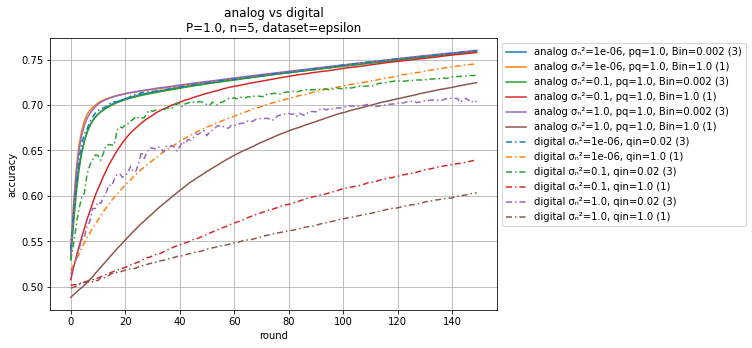

In [3]:
paths = [
    "results/20210825-epsilon-1",
    "results/20210825-epsilon-2",
    "results/20210825a-epsilon-1",
    "results/20210825a-epsilon-2",
]
epsilon_specs = {
    'dataset':                  ('title',  'epsilon'),
    'lr_client':                ('expect', 0.01),
    'momentum_client':          ('expect', 0.0),
    'weight_decay_client':      ('expect', 0.0),
    'data_per_client':          ('expect', 20000),
    'clients':                  ('title',  5),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)
analog_specs.update({
    'parameter_radius_initial': ('series', '__all__', {'missing-treat-as': 1.0}),
    'power_quantile':           ('series', 1.0),
})
digital_specs.update({
    'qrange_initial':           ('series', '__all__', {'missing-treat-as': 1.0}),
    'qrange_param_quantile':    ('expect', 1.0),
    'qrange_client_quantile':   ('expect', 1.0),
})

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

- Skipping 12 runs that don't match on 1 keys: clients (12)
- Skipping 12 runs that don't match on 1 keys: clients (12)


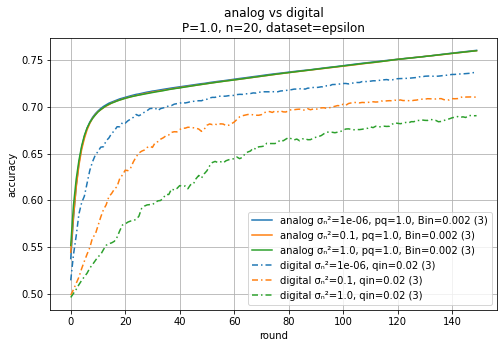

In [4]:
analog_specs['clients'] = ('title', 20)
digital_specs['clients'] = ('title', 20)
plot_comparison('accuracy', paths, analog_specs, digital_specs)

# Fashion-MNIST CNN2

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **24 Aug 2021, 18:35:44** | 24 Aug 2021, 19:19:01 | 43 min 17 s |
| last to finish | 24 Aug 2021, 20:58:59 | **24 Aug 2021, 21:39:39** | 40 min 40 s |
| shortest | 24 Aug 2021, 20:58:48 | 24 Aug 2021, 21:39:18 | **40 min 30 s** |
| longest | 24 Aug 2021, 18:35:44 | 24 Aug 2021, 19:23:32 | **47 min 47 s** |


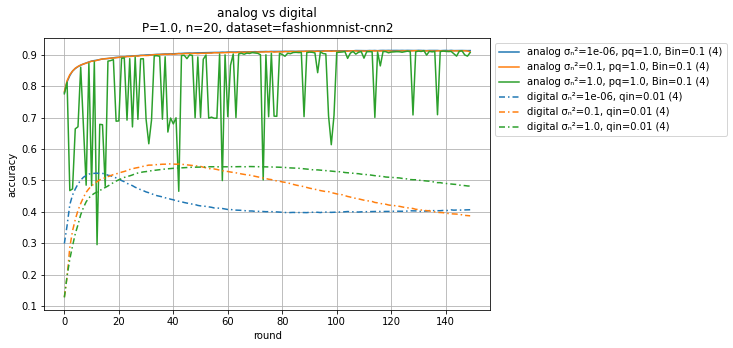

In [5]:
paths = [
    "results/20210825-fashionmnist-cnn2",
]
fmnist_cnn2_specs = {
    'dataset':                  ('title',  'fashionmnist-cnn2'),
    'momentum_client':          ('expect', 0.0),
    'weight_decay_client':      ('expect', 0.0),
    'data_per_client':          ('expect', None),
    'clients':                  ('title',  20),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(fmnist_cnn2_specs)
digital_specs.update(fmnist_cnn2_specs)
analog_specs.update({
    'lr_client':                ('expect', 0.05),
    'parameter_radius_initial': ('series', '__all__', {'missing-treat-as': 1.0}),
    'power_quantile':           ('series', 1.0),
})
digital_specs.update({
    'lr_client':                ('expect', 0.01),
    'qrange_initial':           ('series', '__all__', {'missing-treat-as': 1.0}),
    'qrange_param_quantile':    ('expect', 0.99),
    'qrange_client_quantile':   ('expect', 1.0),
})

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# CIFAR-10 simple

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **25 Aug 2021, 02:20:34** | 25 Aug 2021, 03:06:15 | 45 min 41 s |
| last to finish | 25 Aug 2021, 03:54:22 | **25 Aug 2021, 04:40:57** | 46 min 35 s |
| shortest | 25 Aug 2021, 03:50:45 | 25 Aug 2021, 04:35:26 | **44 min 41 s** |
| longest | 25 Aug 2021, 03:07:15 | 25 Aug 2021, 03:54:22 | **47 min 06 s** |


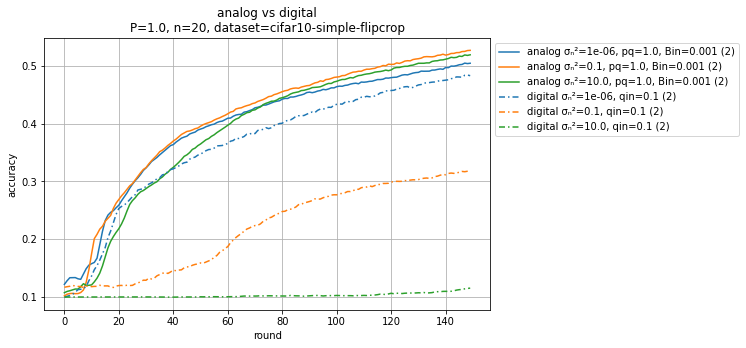

In [9]:
paths = [
    "results/20210825-cifar10-simple-1",
    "results/20210825-cifar10-simple-2",
]
cifar10_simple_specs = {
    'dataset':                  ('title',  'cifar10-simple-flipcrop'),
    'lr_client':                ('expect', 0.001),
    'momentum_client':          ('expect', 0.9),
    'weight_decay_client':      ('expect', 0.0),
    'data_per_client':          ('expect', None),
    'clients':                  ('title',  20),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)
analog_specs.update({
    'parameter_radius_initial': ('series', '__all__', {'missing-treat-as': 1.0}),
    'power_quantile':           ('series', 1.0),
})
digital_specs.update({
    'qrange_initial':           ('series', '__all__', {'missing-treat-as': 1.0}),
    'qrange_param_quantile':    ('expect', 1.0),
    'qrange_client_quantile':   ('expect', 1.0),
})

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# CIFAR-10 ResNet

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **24 Aug 2021, 19:30:30** | 24 Aug 2021, 20:39:48 | 1 h 09 min 18 s |
| last to finish | 24 Aug 2021, 20:41:40 | **24 Aug 2021, 21:53:22** | 1 h 11 min 42 s |
| shortest | 24 Aug 2021, 20:38:28 | 24 Aug 2021, 21:45:39 | **1 h 07 min 10 s** |
| longest | 24 Aug 2021, 20:41:40 | 24 Aug 2021, 21:53:22 | **1 h 11 min 42 s** |


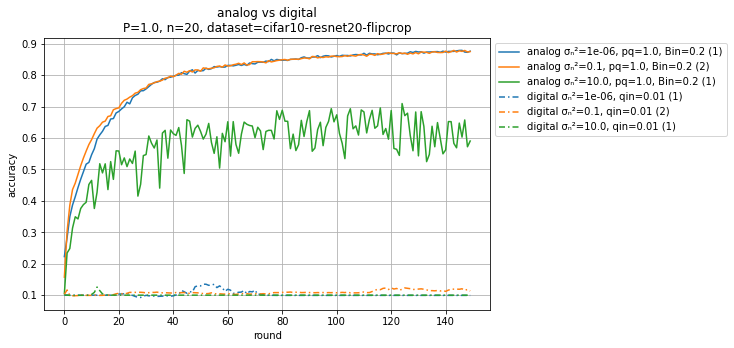

In [7]:
paths = [
    "results/20210825-cifar10-resnet20",
]
cifar10_resnet20_specs = {
    'dataset':                  ('title',  'cifar10-resnet20-flipcrop'),
    'lr_client':                ('expect', 0.1),
    'momentum_client':          ('expect', 0.9),
    'weight_decay_client':      ('expect', 1e-4),
    'data_per_client':          ('expect', None),
    'clients':                  ('title',  20),
    'batch_size':               ('expect', 128),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_resnet20_specs)
digital_specs.update(cifar10_resnet20_specs)
analog_specs.update({
    'parameter_radius_initial': ('series', '__all__', {'missing-treat-as': 1.0}),
    'power_quantile':           ('series', 1.0),
})
digital_specs.update({
    'qrange_initial':           ('series', '__all__', {'missing-treat-as': 1.0}),
    'qrange_param_quantile':    ('expect', 0.9),
    'qrange_client_quantile':   ('expect', 0.9),
})

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')